### Logistics Regression

Purpose: To predict whether a Spotify user will churn (cancel subscription) or remain active.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('spotify_churn_dataset.csv')

In [3]:
df.shape

(8000, 12)

In [4]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,Yes
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,No
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,Yes
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,No
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 8000 non-null   int64  
 1    gender                 8000 non-null   object 
 2    age                    8000 non-null   int64  
 3    country                8000 non-null   object 
 4    subscription_type      8000 non-null   object 
 5    listening_time         8000 non-null   int64  
 6    songs_played_per_day   8000 non-null   int64  
 7    skip_rate              8000 non-null   float64
 8    device_type            8000 non-null   object 
 9    ads_listened_per_week  8000 non-null   int64  
 10   offline_listening      8000 non-null   int64  
 11   is_churned             8000 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 750.1+ KB


In [6]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000


In [7]:
# Drop the unecessory variables
df.drop('user_id', axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    gender                 8000 non-null   object 
 1    age                    8000 non-null   int64  
 2    country                8000 non-null   object 
 3    subscription_type      8000 non-null   object 
 4    listening_time         8000 non-null   int64  
 5    songs_played_per_day   8000 non-null   int64  
 6    skip_rate              8000 non-null   float64
 7    device_type            8000 non-null   object 
 8    ads_listened_per_week  8000 non-null   int64  
 9    offline_listening      8000 non-null   int64  
 10   is_churned             8000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 687.6+ KB


### Types of variables

##### Categorical variables

In [9]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables\n'.format(len(categorical)))
print("The categorical variables are:", categorical)

There are 5 categorical variables

The categorical variables are: [' gender', ' country', ' subscription_type', ' device_type', ' is_churned']


In [10]:
# View categorical variables
df[categorical].head()

,gender,country,subscription_type,device_type,is_churned
0,Female,CA,Free,Desktop,Yes
1,Other,DE,Family,Web,No
2,Male,AU,Premium,Mobile,Yes
3,Female,CA,Student,Mobile,No
4,Other,US,Family,Mobile,Yes


In [11]:
# Check missing values in categorical variables
df[categorical].isnull().sum()

gender               0
country              0
subscription_type    0
device_type          0
is_churned           0
dtype: int64

##### Numerical variables

In [12]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
print("There are {} numericcal variables\n".format(len(numerical)))
print("The numerical variables are:", numerical)

There are 6 numericcal variables

The numerical variables are: [' age', ' listening_time', ' songs_played_per_day', ' skip_rate', ' ads_listened_per_week', ' offline_listening']


In [13]:
df[numerical].head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening
0,54,26,23,0.20,31,0
1,33,141,62,0.34,0,1
2,38,199,38,0.04,0,1
3,22,36,2,0.31,0,1
4,29,250,57,0.36,0,1


In [14]:
# Check missing values in numerical variables
df[numerical].isnull().sum()

age                      0
listening_time           0
songs_played_per_day     0
skip_rate                0
ads_listened_per_week    0
offline_listening        0
dtype: int64

### Check for Outliers

Text(0, 0.5, ' offline_listening')

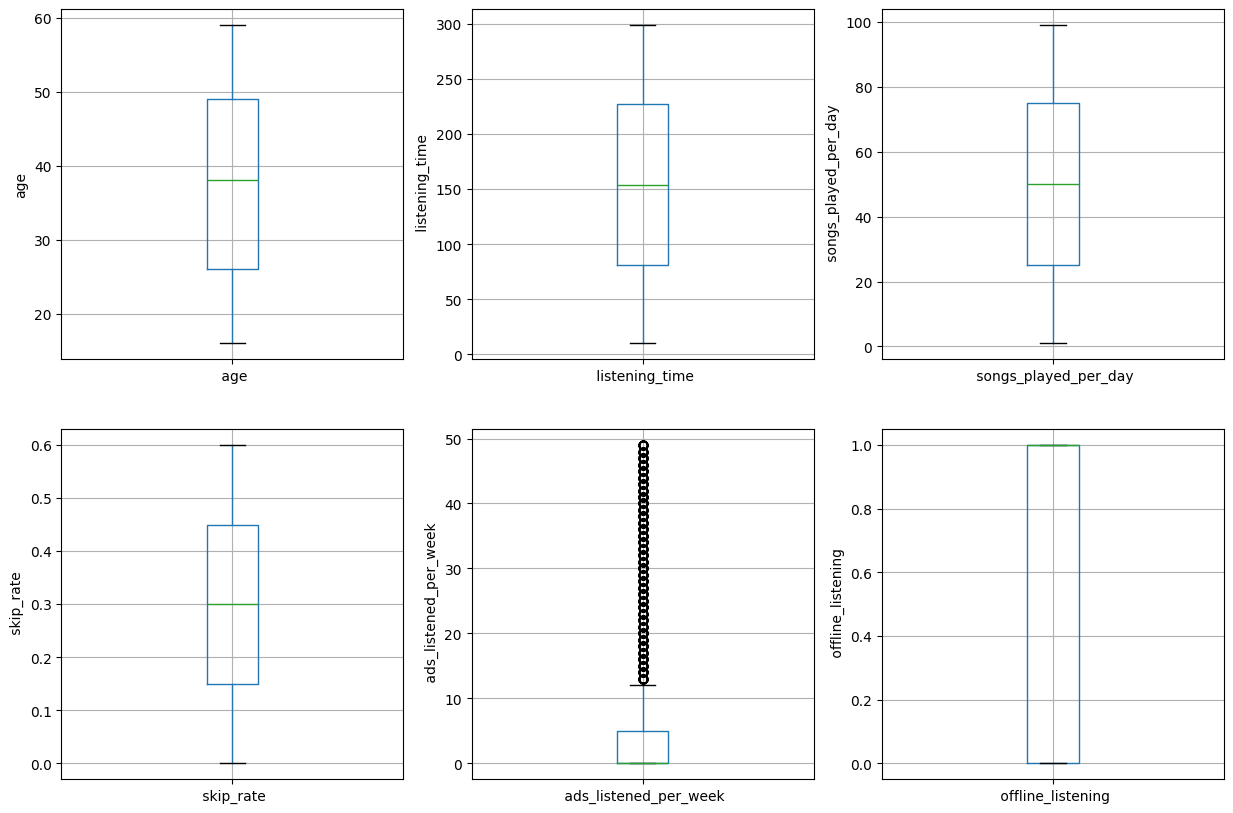

In [15]:
# Draw boxplot to visualize outliers

plt.figure(figsize = (15, 10))

plt.subplot(2, 3, 1)
fig = df.boxplot(column = ' age')
fig.set_ylabel('age')

plt.subplot(2, 3, 2)
fig = df.boxplot(column = ' listening_time')
fig.set_ylabel(' listening_time')

plt.subplot(2, 3, 3)
fig = df.boxplot(column = ' songs_played_per_day')
fig.set_ylabel(' songs_played_per_day')

plt.subplot(2, 3, 4)
fig = df.boxplot(column = ' skip_rate')
fig.set_ylabel(' skip_rate')

plt.subplot(2, 3, 5)
fig = df.boxplot(column = ' ads_listened_per_week')
fig.set_ylabel(' ads_listened_per_week')

plt.subplot(2, 3, 6)
fig = df.boxplot(column = ' offline_listening')
fig.set_ylabel(' offline_listening')

In [16]:
# Find outliers for ads_listened_per_week attribute
IQR = df[' ads_listened_per_week'].quantile(0.75) - df[' ads_listened_per_week'].quantile(0.25)
Lower_range = df[' ads_listened_per_week'].quantile(0.25) - (IQR * 1.5)
Upper_range = df[' ads_listened_per_week'].quantile(0.75) + (IQR * 1.5)
print("ads_listened_per_week outlier values are < {} or > {}".format(Lower_range, Upper_range))

ads_listened_per_week outlier values are < -7.5 or > 12.5


### Declare feature vector and target variable

In [17]:
X = df.drop([' is_churned'], axis = 1)
Y = df[' is_churned']

### Split data into training and testing set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [19]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 10), (2400, 10))

### Encoding

In [20]:
categorical

[' gender', ' country', ' subscription_type', ' device_type', ' is_churned']

In [21]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = [' subscription_type'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [22]:
X_train.head()

,gender,age,country,subscription_type_0,subscription_type_1,subscription_type_2,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening
607,Other,21,IN,0,0,1,91,20,0.56,Web,0,1
5279,Other,31,UK,0,1,0,81,36,0.43,Mobile,0,1
6403,Male,47,UK,0,1,1,119,24,0.47,Desktop,14,0
1732,Other,49,UK,0,0,1,239,93,0.54,Desktop,0,1
5266,Female,52,AU,1,0,0,132,44,0.33,Mobile,0,1


In [23]:
X_train = pd.concat([X_train[numerical], X_train[[' subscription_type_0', ' subscription_type_1', ' subscription_type_2']],
                     pd.get_dummies(X_train[' gender']),
                     pd.get_dummies(X_train[' country']),
                     pd.get_dummies(X_train[' device_type'])], axis = 1)

In [24]:
X_train.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,subscription_type_0,subscription_type_1,subscription_type_2,Female,...,CA,DE,FR,IN,PK,UK,US,Desktop,Mobile,Web
607,21,91,20,0.56,0,1,0,0,1,False,...,False,False,False,True,False,False,False,False,False,True
5279,31,81,36,0.43,0,1,0,1,0,False,...,False,False,False,False,False,True,False,False,True,False
6403,47,119,24,0.47,14,0,0,1,1,False,...,False,False,False,False,False,True,False,True,False,False
1732,49,239,93,0.54,0,1,0,0,1,False,...,False,False,False,False,False,True,False,True,False,False
5266,52,132,44,0.33,0,1,1,0,0,True,...,False,False,False,False,False,False,False,False,True,False


In [25]:
X_test = pd.concat([X_test[numerical], X_test[[' subscription_type_0', ' subscription_type_1', ' subscription_type_2']],
                    pd.get_dummies(X_test[' gender']),
                    pd.get_dummies(X_test[' country']),
                    pd.get_dummies(X_test[' device_type'])], axis = 1)

In [26]:
X_test.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,subscription_type_0,subscription_type_1,subscription_type_2,Female,...,CA,DE,FR,IN,PK,UK,US,Desktop,Mobile,Web
3069,24,59,96,0.39,30,0,0,1,1,False,...,False,False,False,True,False,False,False,False,True,False
1675,48,272,96,0.34,46,0,0,1,1,True,...,False,False,False,True,False,False,False,True,False,False
6385,43,299,97,0.06,0,1,1,0,0,False,...,False,False,True,False,False,False,False,True,False,False
543,44,169,69,0.06,0,1,0,0,1,True,...,False,False,False,False,False,False,False,False,False,True
3213,57,201,53,0.14,0,1,0,1,0,False,...,False,False,False,False,False,False,True,True,False,False


### Feature Scalling

In [27]:
X_train.describe()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,subscription_type_0,subscription_type_1,subscription_type_2
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,37.536964,154.160536,50.158571,0.298411,6.787500,0.750357,0.266607,0.494286,0.488750
std,12.767323,83.769100,28.370842,0.173634,13.439838,0.432845,0.442225,0.500012,0.499918
min,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,81.000000,25.000000,0.150000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,49.000000,226.000000,75.000000,0.450000,0.000000,1.000000,1.000000,1.000000,1.000000
max,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
cols = X_train.columns

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [31]:
X_train.describe()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,subscription_type_0,subscription_type_1,subscription_type_2,Female,...,CA,DE,FR,IN,PK,UK,US,Desktop,Mobile,Web
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,...,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,0.500860,0.498825,0.501618,0.497351,0.138520,0.750357,0.266607,0.494286,0.488750,0.330000,...,0.121071,0.122321,0.125179,0.127679,0.125179,0.121250,0.128214,0.343036,0.329643,0.327321
std,0.296914,0.289858,0.289498,0.289390,0.274282,0.432845,0.442225,0.500012,0.499918,0.470255,...,0.326239,0.327686,0.330951,0.333761,0.330951,0.326447,0.334358,0.474766,0.470125,0.469278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232558,0.245675,0.244898,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.511628,0.498270,0.500000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.767442,0.747405,0.755102,0.750000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Training

In [35]:
# Train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(solver = 'liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


### Predict the result

In [37]:
Y_pred_test = logreg.predict(X_test)
Y_pred_test

array([' No', ' No', ' No', ..., ' No', ' No', ' No'],
      shape=(2400,), dtype=object)

### predict_proba method

In [40]:
# Probability of getting output as 0 - not churned
logreg.predict_proba(X_test)[:,0]

array([0.74736638, 0.76983266, 0.73954019, ..., 0.74965608, 0.74425169,
       0.75486521], shape=(2400,))

In [41]:
# Probabilty of getting output as 1 - churned
logreg.predict_proba(X_test)[:,1]

array([0.25263362, 0.23016734, 0.26045981, ..., 0.25034392, 0.25574831,
       0.24513479], shape=(2400,))

### Check accuracy score

In [42]:
from sklearn.metrics import accuracy_score
print("Moddel accuracy score: {0:0.4f}".format(accuracy_score(Y_test, Y_pred_test)))

Moddel accuracy score: 0.7317


### Compare the train-set and test-set accuracy

In [43]:
Y_pred_train = logreg.predict(X_train)
Y_pred_train

array([' No', ' No', ' No', ..., ' No', ' No', ' No'],
      shape=(5600,), dtype=object)

In [46]:
print("Train set accuracy score: {0:0.4f}". format(accuracy_score(Y_train, Y_pred_train)))

Train set accuracy score: 0.7452


### Check for overfitting and underfitting

In [47]:
# Print the score on training and test set
print("Training test score: {:.4f}". format(logreg.score(X_train, Y_train)))
print("Test set score: {:.4f}". format(logreg.score(X_test, Y_test)))

Training test score: 0.7452
Test set score: 0.7317


In [49]:
# Fit the Logistic Regression model with C = 100

# Instantiate the model with C = 100
logreg100 = LogisticRegression(solver = 'liblinear', C = 100, random_state = 0)

# Fit the mdoel
logreg100.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [52]:
# Print the scores on training and test set
print("Training set score: {:.4f}". format(logreg100.score(X_train, Y_train)))
print("Test setr score: {:.4f}". format(logreg100.score(X_test, Y_test)))

Training set score: 0.7452
Test setr score: 0.7317


In [51]:
# Fit the Logestic Regression model with C = 0.01

# Instantiate the model with C = 0.01
logreg001 = LogisticRegression(solver = 'liblinear', C = 0.01, random_state = 0)

# Fit the model
logreg001.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [53]:
# Print the scores on training and test set
print("Training set score: {:.4f}". format(logreg001.score(X_train, Y_train)))
print("Test set score: {:.4f}". format(logreg001.score(X_test, Y_test)))

Training set score: 0.7452
Test set score: 0.7317


### Compare model accuracy with null accuracy

In [54]:
# Check class distribution in the test set

Y_test.value_counts()

 is_churned
No     1756
Yes     644
Name: count, dtype: int64

In [55]:
# Check null accuracy score

null_accuracy = (1756/(1756+644))
print("Null accuracy score: {0:0.4f}". format(null_accuracy))

Null accuracy score: 0.7317


### Confusion Matrix

In [56]:
# Print the confusion matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_test)

print("Confusion matrix\n\n", cm)
print("\nTrue Positives(TP) = ", cm[0, 0])
print("\nTrue Negatives(TN) = ", cm[1, 1])
print("\nFalse Positives(FP) = ", cm[0, 1])
print("\nFalse Negatives(FN) = ", cm[1, 0])

Confusion matrix

 [[1756    0]
 [ 644    0]]

True Positives(TP) =  1756

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  644


<Axes: >

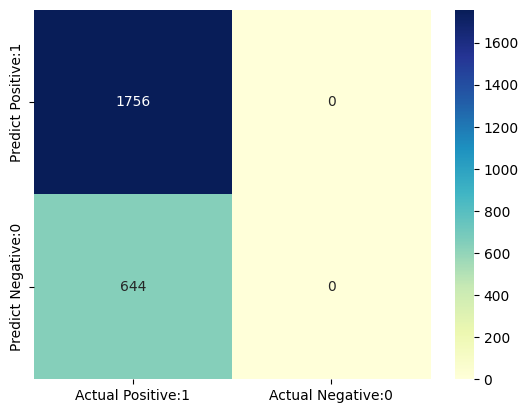

In [57]:
# Visual confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                    index = ['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

### Classification metrices
#### Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

We can print a classification report as follows:-

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1756
         Yes       0.00      0.00      0.00       644

    accuracy                           0.73      2400
   macro avg       0.37      0.50      0.42      2400
weighted avg       0.54      0.73      0.62      2400



c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

### Classification accuracy

In [59]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [60]:
# Print classification accuracy

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification error: {0:0.4f}". format(classification_error))

Classification error: 0.2683


### Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [61]:
# Print precision score

precision = TP / float(TP + FP)
print("Precision: {0:0.4f}". format(precision))

Precision: 1.0000


### Recall

In [62]:
recall = TP / float(TP + FN)
print("Recall or Sensitivity: {0:0.4f}". format(recall))

Recall or Sensitivity: 0.7317


### False Positive Rate

In [65]:
false_positive_rate = FP / float(FP + TN)
print("False Positive rate: {0:0.4f}". format(false_positive_rate))

False Positive rate: nan


C:\Users\susha\AppData\Local\Temp\ipykernel_6820\3486057478.py:1: RuntimeWarning: invalid value encountered in divide
  false_positive_rate = FP / float(FP + TN)


### Specificity

In [67]:
specificity = TN / float(TN + FP)
print("Specificity: {0:0.4f}". format(specificity))

Specificity: nan


C:\Users\susha\AppData\Local\Temp\ipykernel_6820\2914962499.py:1: RuntimeWarning: invalid value encountered in divide
  specificity = TN / float(TN + FP)


### F1 Score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

### Adjusting the threshold level

In [68]:
# Print the first 10 predicted probabilitues of two classes- 0 and 1
Y_pred_prob = logreg.predict_proba(X_test)[0: 10]
Y_pred_prob

array([[0.74736638, 0.25263362],
       [0.76983266, 0.23016734],
       [0.73954019, 0.26045981],
       [0.75807159, 0.24192841],
       [0.73039272, 0.26960728],
       [0.73724712, 0.26275288],
       [0.7464829 , 0.2535171 ],
       [0.71850217, 0.28149783],
       [0.73143884, 0.26856116],
       [0.73284061, 0.26715939]])

In [69]:
# Store the probabilities in dataframe

Y_pred_prob_df = pd.DataFrame(data = Y_pred_prob, columns = ['Prob of - is_churned(0)', 'Prob of - is_churned(1)'])
Y_pred_prob_df

,Prob of - is_churned(0),Prob of - is_churned(1)
0,0.747366,0.252634
1,0.769833,0.230167
2,0.739540,0.260460
3,0.758072,0.241928
4,0.730393,0.269607
5,0.737247,0.262753
6,0.746483,0.253517
7,0.718502,0.281498
8,0.731439,0.268561
9,0.732841,0.267159


In [71]:
# Print the first 10 predicted probabilities of for class 1 - Probability of rain
logreg.predict_proba(X_test)[0:10, 1]

array([0.25263362, 0.23016734, 0.26045981, 0.24192841, 0.26960728,
       0.26275288, 0.2535171 , 0.28149783, 0.26856116, 0.26715939])

In [72]:
# Store the predicted probabilities for class 1 - Probability of rain
Y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

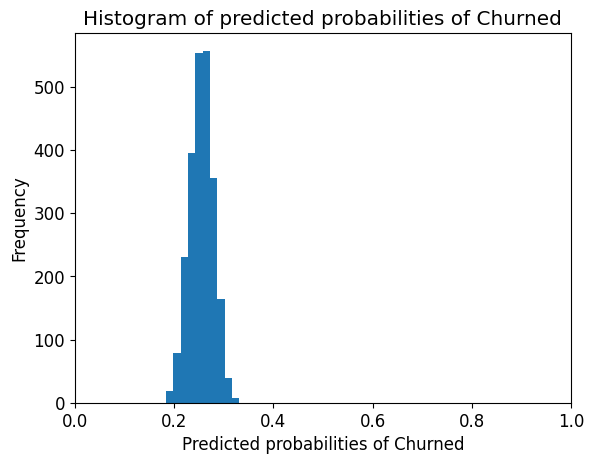

In [73]:
# Plot histogram of predicted probabilities

# Adjust the font size
plt.rcParams['font.size'] = 12

# Plot histogram with 10 bins
plt.hist(Y_pred1, bins = 10)

# Set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Churned')

# Set the X-axis limit
plt.xlim(0, 1)

# Set the title
plt.xlabel('Predicted probabilities of Churned')
plt.ylabel('Frequency')

### Lower the threshold

In [78]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    Y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    Y_pred1 = Y_pred1.reshape(-1,1)
    
    Y_pred2 = binarize(Y_pred1, threshold = i/10)
    
    Y_pred2 = np.where(Y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(Y_test, Y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(Y_test, Y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[   0    0 1756]
 [   0    0  644]
 [   0    0    0]] 

 with 0 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0 

 Sensitivity:  nan 

 Specificity:  nan 



With 0.2 threshold the Confusion Matrix is  

 [[   0    0   15 1741]
 [   0    0    5  639]
 [   0    0    0    0]
 [   0    0    0    0]] 

 with 0 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0 

 Sensitivity:  nan 

 Specificity:  nan 



With 0.3 threshold the Confusion Matrix is  

 [[   0    0 1706   50]
 [   0    0  628   16]
 [   0    0    0    0]
 [   0    0    0    0]] 

 with 0 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0 

 Sensitivity:  nan 

 Specificity:  nan 



With 0.4 threshold the Confusion Matrix is  

 [[   0    0 1756]
 [   0    

C:\Users\susha\AppData\Local\Temp\ipykernel_6820\3360653571.py:27: RuntimeWarning: invalid value encountered in divide
  'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
C:\Users\susha\AppData\Local\Temp\ipykernel_6820\3360653571.py:29: RuntimeWarning: invalid value encountered in divide
  'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
C:\Users\susha\AppData\Local\Temp\ipykernel_6820\3360653571.py:27: RuntimeWarning: invalid value encountered in divide
  'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
C:\Users\susha\AppData\Local\Temp\ipykernel_6820\3360653571.py:29: RuntimeWarning: invalid value encountered in divide
  'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
C:\Users\susha\AppData\Local\Temp\ipykernel_6820\3360653571.py:27: RuntimeWarning: invalid value encountered in divide
  'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
C:\Users\susha\AppData\Local\Temp\ipykernel_6820\3360653571.py:29: RuntimeWarning: invalid v

### ROC - AUC

#### ROC Curve

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


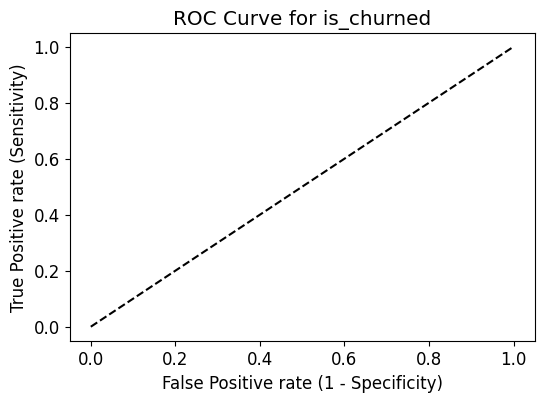

In [79]:
# plot ROC Curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred1, pos_label = 'Yes')
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for is_churned')
plt.xlabel('False Positive rate (1 - Specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
plt.show()

### ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [80]:
# Compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(Y_test, Y_pred1)
print("ROC AUC: {:.4f}". format(ROC_AUC))

ROC AUC: 0.5043


### Model evaluation and improvement

#### Recursive Feature Elimination with Cross Validation

In [81]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator = logreg, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(X_train, Y_train)

In [82]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 1


In [83]:
# Transform the training data

X_train_rfecv = rfecv.transform(X_train)

# Transform classifier 

logreg.fit(X_train_rfecv, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [84]:
# Test classifiers on Test data

X_test_rfecv = rfecv.transform(X_test)
Y_pred_rfecv = logreg.predict(X_test_rfecv)

In [85]:
# print mean accuracy on transformed test data and labels

print("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv, Y_test)))

Classifier score: 0.7317


### k-Fold Cross Validation

In [88]:
# Applying 10 - Fold Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, Y_train, cv = 5, scoring = 'accuracy')
print("Cross Validation Score: {}". format(scores))

Cross Validation Score: [0.74553571 0.74553571 0.74553571 0.74464286 0.74464286]


We can summarize the cross-validation accuracy by calculating its mean.

In [89]:
# compute Average cross-validation score

print("Average Cross Validation Score: {:.4f}".format(scores.mean()))

Average Cross Validation Score: 0.7452


### Hyperparameter Optimization using GridSearch CV

In [91]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1', 'l2']}, {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logreg, param_grid = parameters, scoring = 'accuracy', cv = 5, verbose = 0)

grid_search.fit(X_train, Y_train)

,estimator,LogisticRegre...r='liblinear')
,param_grid,"[{'penalty': ['l1', 'l2']}, {'C': [1, 10, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [92]:
# Examin the best model

# Best score achived during the GridSearchCV
print("GridSearch CV best score: {:.4f}\n\n". format(grid_search.best_score_))

# Print parameters that gives the best result
print("Parameters that gives the best result:","\n\n", (grid_search.best_params_))

# Print estimator that was chosen by the GridSearch
print("\n\nEstimator that was chosen by the search:","\n\n", (grid_search.best_estimator_))

GridSearch CV best score: 0.7452


Parameters that gives the best result: 

 {'penalty': 'l1'}


Estimator that was chosen by the search: 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [93]:
# Calculate GridSearch CV score on the test set
print("GridSearch CV score on the test set: {0:0.4f}". format(grid_search.score(X_test, Y_test)))

GridSearch CV score on the test set: 0.7317
